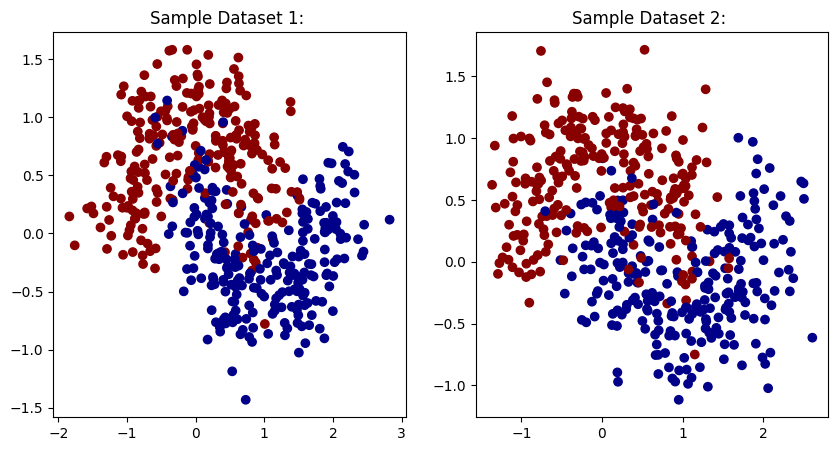

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

datasets = []
datasets.append(make_moons(500, noise=0.3, random_state=0x1701a))
datasets.append(make_moons(500, noise=0.3, random_state=0x1701b))

plt.figure(figsize=(10, 5))
for idx in range(2):
    X, y = datasets[idx]
    plt.subplot(1, 2, idx+1)
    plt.scatter(X[:, 0], X[:, 1], cmap = ListedColormap(['#880000', '#000088']), c=y)
    plt.title("Sample Dataset {}: ".format(idx+1))
plt.show()

X1, y1 = datasets[0]
xTrain1, xTest1, yTrain1, yTest1 = train_test_split(X1, y1, test_size=0.1, random_state=42)

X2, y2 = datasets[1]
xTrain2, xTest2, yTrain2, yTest2 = train_test_split(X2, y2, test_size=0.1, random_state=42)


xTrain = [xTrain1, xTrain2]
xTest = [xTest1, xTest2]
yTrain = [yTrain1, yTrain2]
yTest = [yTest1, yTest2]

In [2]:
### Grab the model ###
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import roc_curve, auc

def plot_surface(model, X, y) :
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    
    # Predict
    z = model.predict(X_grid)
    z = z.reshape(xx.shape)
    
    # Plot
    plt.contourf(xx, yy, z, cmap='RdBu', alpha=.8)
    plt.scatter(X[:,0],X[:,1], cmap = ListedColormap(['#880000', '#000088']), c = y)
    
def train_test_model(model_factory):
    # Plot them all together
    plt.figure(figsize=(20,10))
    for d in range(2):
        plt.subplot(1, 2, d+1)
        # x_train, y_train = datasets[d]
        model = model_factory()
        model.fit(xTrain[d], yTrain[d])
        plot_surface(model, xTrain[d], yTrain[d])
        
        training_pred = model.predict(xTrain[d])
        fpr, tpr, _ = roc_curve(training_pred, yTrain[d])
        roc_auc = auc(fpr, tpr)
        print(f'Training AUC: {roc_auc}')

        test_pred = model.predict(xTest[d])
        fpr_test, tpr_test, _ = roc_curve(test_pred, yTest[d])
        roc_auc_test = auc(fpr_test, tpr_test)
        print(f'Test AUC: {roc_auc_test}')


plt.show()

Training AUC: 1.0
Test AUC: 0.8421900161030597
Training AUC: 1.0
Test AUC: 0.8607085346215781


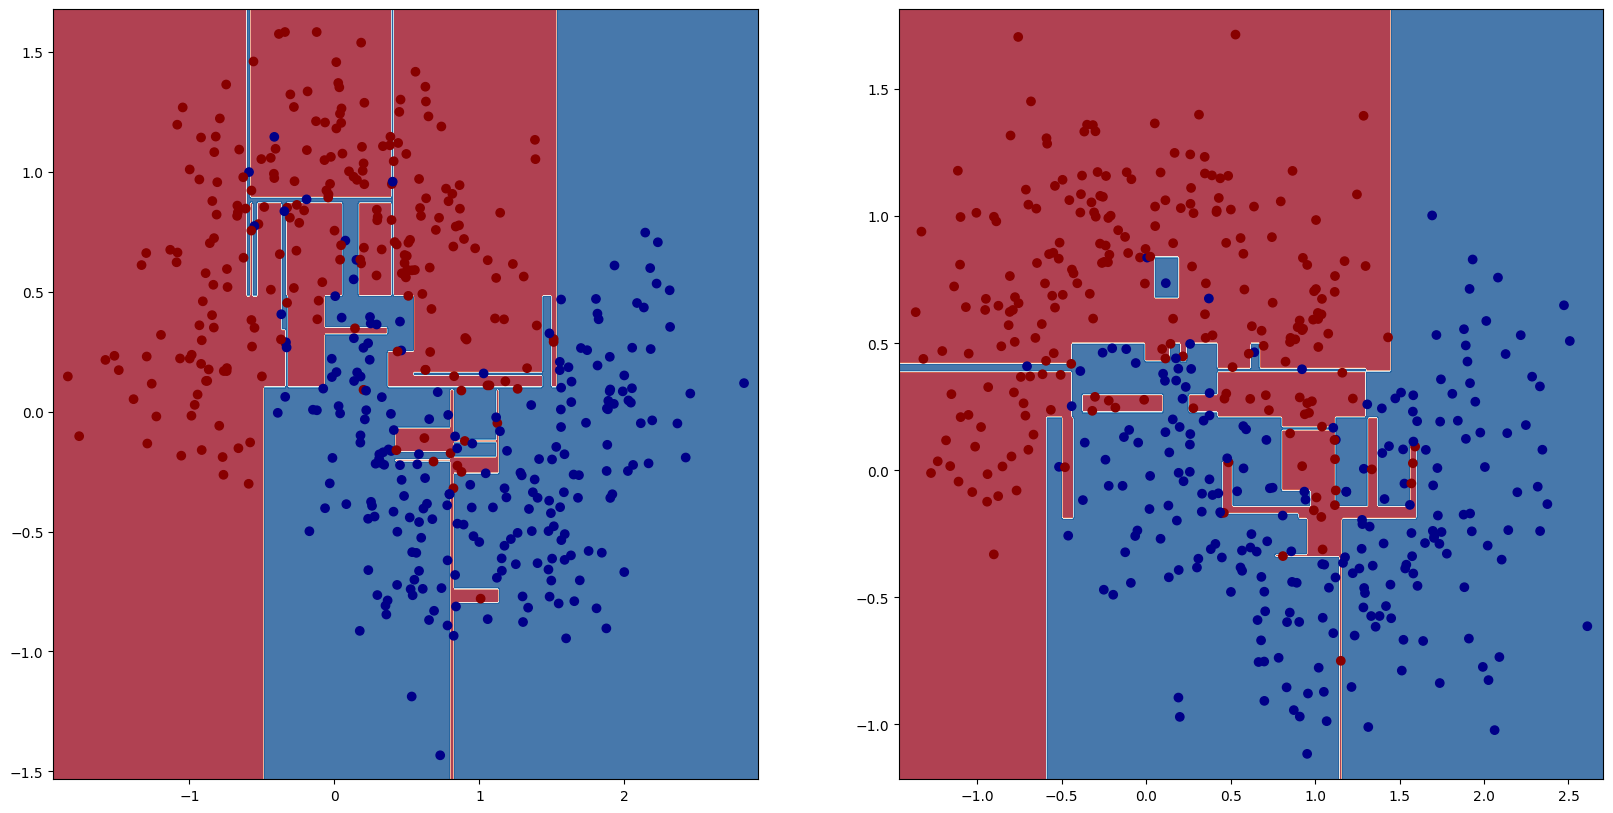

In [3]:

def decisionTreeFactory():
    return DecisionTreeClassifier()

train_test_model(decisionTreeFactory)


Training AUC: 1.0
Test AUC: 0.8652597402597402
Training AUC: 1.0
Test AUC: 0.9


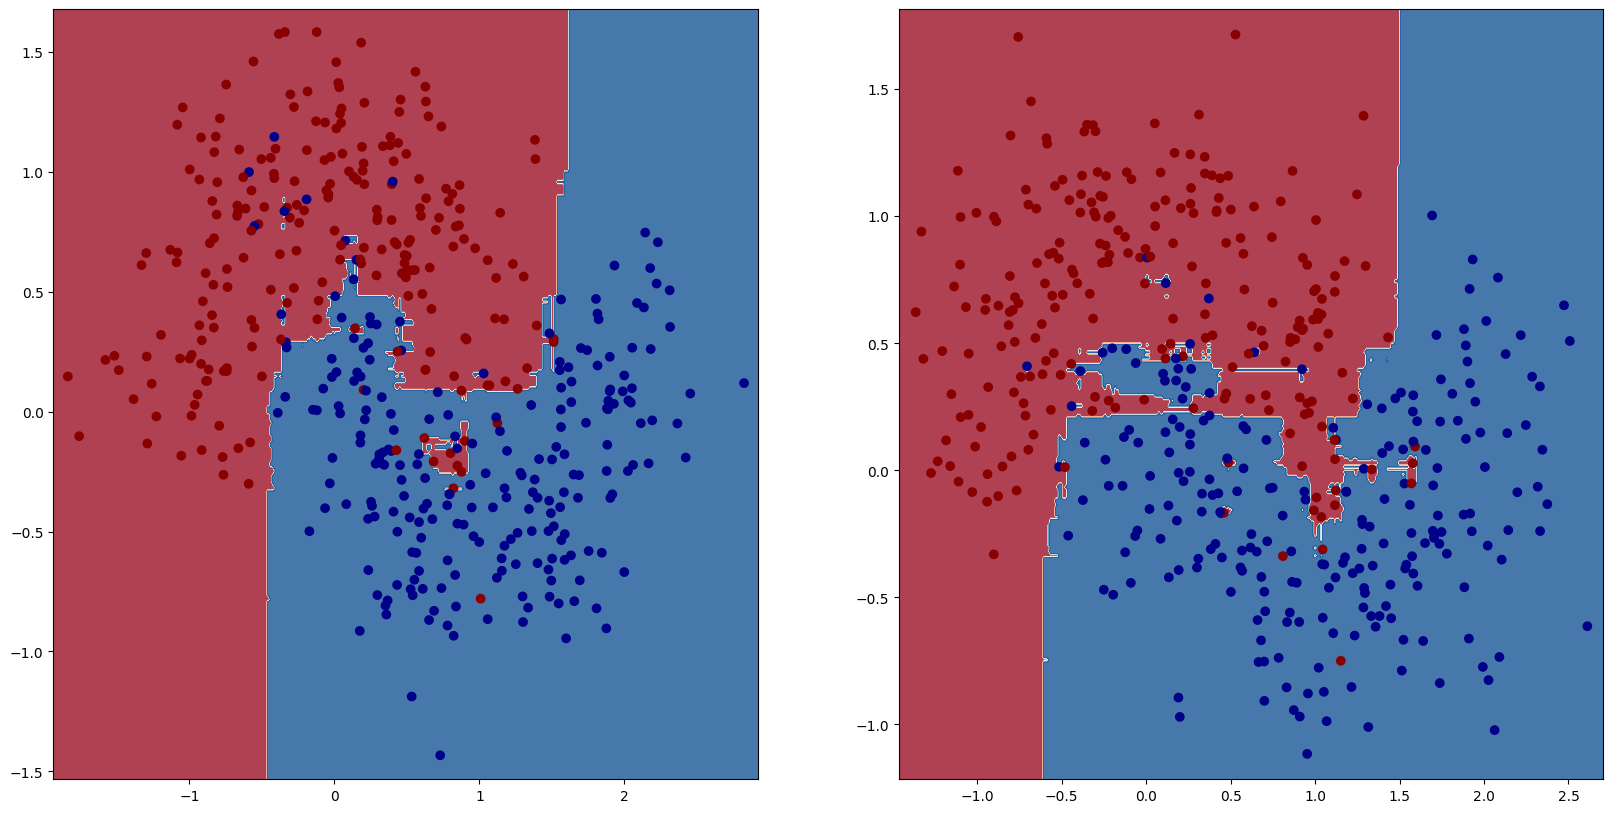

In [4]:
from sklearn.ensemble import RandomForestClassifier

def randomForestFactory():
    return RandomForestClassifier()

train_test_model(randomForestFactory)


Training AUC: 1.0
Test AUC: 0.8205128205128206
Training AUC: 1.0
Test AUC: 0.8798076923076923


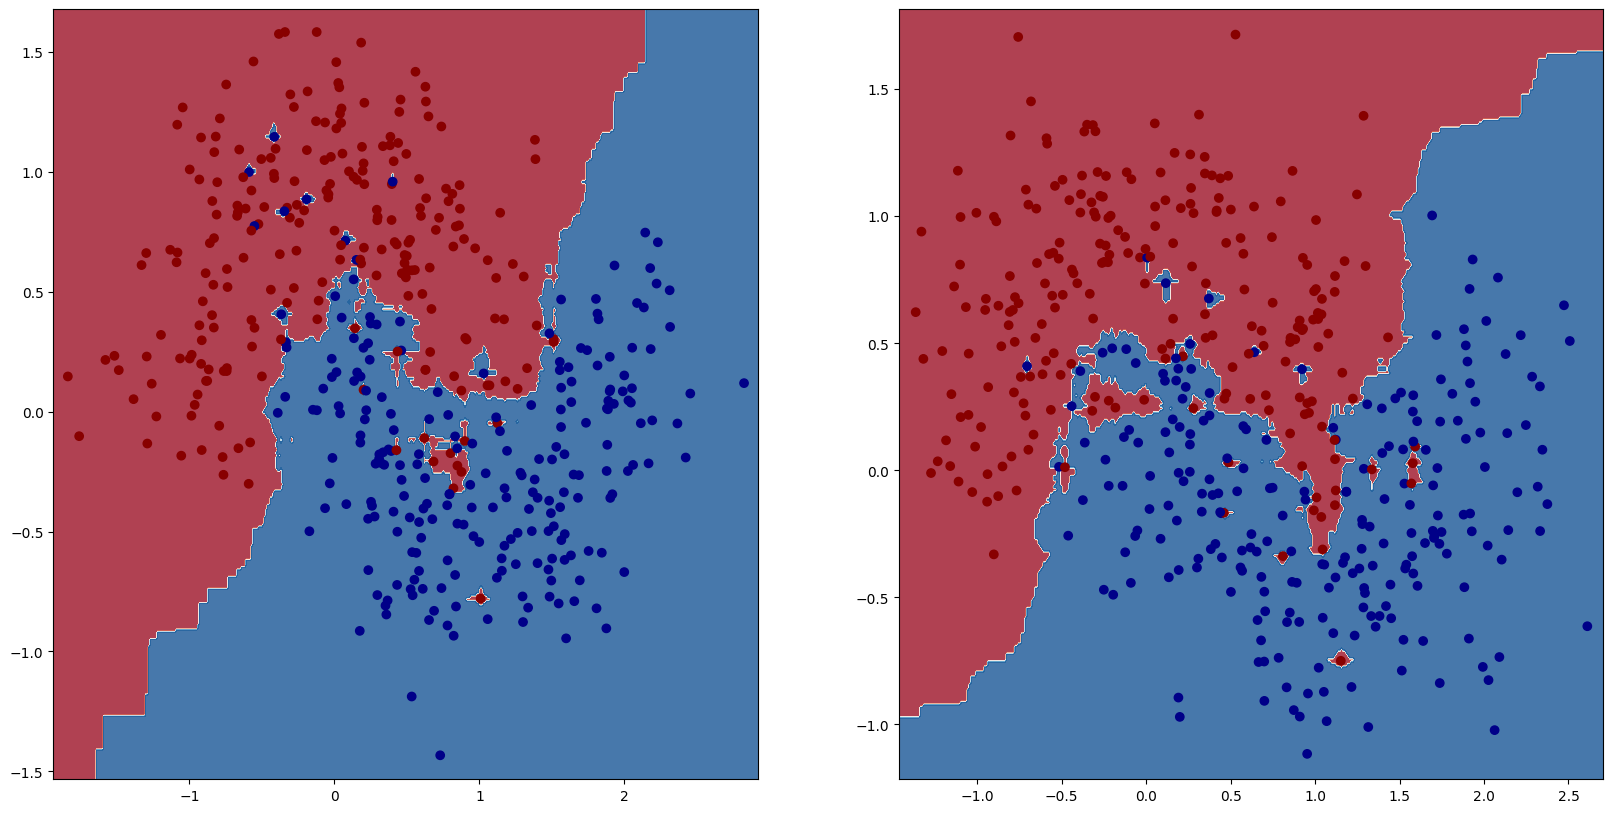

In [5]:
from sklearn.ensemble import ExtraTreesClassifier

def extraTreeFactory():
    return ExtraTreesClassifier()

train_test_model(extraTreeFactory)
